In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import pandas as pd
import numpy as np
import regex
import matplotlib.pyplot as plt
import seaborn as sns
crime = pd.read_csv('/kaggle/input/los-angeles-crime-data-2020-2023/Crime_Data_from_2020_to_Present.csv')

In [10]:
crime.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [8]:
crime.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [11]:
crime.shape

(757141, 28)

In [13]:
crime.dtypes

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

In [14]:
#checking nulls
crime.isna().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           103915
Vict Age               0
Vict Sex           98911
Vict Descent       98917
Premis Cd              9
Premis Desc          442
Weapon Used Cd    494062
Weapon Desc       494062
Status                 0
Status Desc            0
Crm Cd 1              10
Crm Cd 2          701125
Crm Cd 3          755269
Crm Cd 4          757085
LOCATION               0
Cross Street      635409
LAT                    0
LON                    0
dtype: int64

In [17]:
df = crime.drop(labels = ['Mocodes', 'Weapon Used Cd', 'Weapon Desc', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street'], axis = 1)
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,F,B,501.0,SINGLE FAMILY DWELLING,AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,M,H,102.0,SIDEWALK,IC,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,X,X,726.0,POLICE FACILITY,AA,Adult Arrest,845.0,200 E 6TH ST,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,X,X,409.0,BEAUTY SUPPLY STORE,IC,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757136,231604807,01/27/2023 12:00:00 AM,01/26/2023 12:00:00 AM,1800,16,Foothill,1663,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,M,H,122.0,"VEHICLE, PASSENGER/TRUCK",IC,Invest Cont,740.0,12500 BRANFORD ST,34.2466,-118.4054
757137,231606525,03/22/2023 12:00:00 AM,03/22/2023 12:00:00 AM,1000,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,F,H,102.0,SIDEWALK,IC,Invest Cont,230.0,12800 FILMORE ST,34.2790,-118.4116
757138,231210064,04/12/2023 12:00:00 AM,04/12/2023 12:00:00 AM,1630,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,M,B,222.0,LAUNDROMAT,IC,Invest Cont,230.0,6100 S VERMONT AV,33.9841,-118.2915
757139,230115220,07/02/2023 12:00:00 AM,07/01/2023 12:00:00 AM,1,1,Central,154,1,352,PICKPOCKET,...,F,H,735.0,NIGHT CLUB (OPEN EVENINGS ONLY),IC,Invest Cont,352.0,500 S MAIN ST,34.0467,-118.2485


In [18]:
df.sort_values(by = 'Date Rptd')

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON
134156,202104033,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,2140,21,Topanga,2136,2,901,VIOLATION OF RESTRAINING ORDER,...,M,H,501.0,SINGLE FAMILY DWELLING,IC,Invest Cont,901.0,7500 JORDAN AV,34.2065,-118.6029
148788,201704120,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,100,17,Devonshire,1756,2,888,TRESPASSING,...,F,W,501.0,SINGLE FAMILY DWELLING,AO,Adult Other,888.0,17800 DEVONSHIRE ST,34.2576,-118.5217
148777,201204050,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,10,12,77th Street,1259,1,236,INTIMATE PARTNER - AGGRAVATED ASSAULT,...,F,B,501.0,SINGLE FAMILY DWELLING,AO,Adult Other,236.0,76TH ST,33.9713,-118.2652
155723,201904038,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,2200,19,Mission,1902,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,...,F,W,509.0,MOBILE HOME/TRAILERS/CONSTRUCTION TRAILERS/RV'...,AO,Adult Other,626.0,14900 LARKSPUR ST,34.3216,-118.4569
34837,200304059,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,2300,3,Southwest,361,2,237,CHILD NEGLECT (SEE 300 W.I.C.),...,F,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,237.0,4000 URSULA AV,34.0149,-118.3524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478268,231204005,12/31/2022 12:00:00 AM,12/31/2022 12:00:00 AM,1225,12,77th Street,1232,1,210,ROBBERY,...,M,H,108.0,PARKING LOT,IC,Invest Cont,210.0,3100 W SLAUSON AV,33.9890,-118.3270
417180,220222434,12/31/2022 12:00:00 AM,11/24/2022 12:00:00 AM,1900,2,Rampart,236,1,330,BURGLARY FROM VEHICLE,...,F,O,101.0,STREET,IC,Invest Cont,330.0,100 S BURLINGTON AV,34.0650,-118.2666
417118,220917853,12/31/2022 12:00:00 AM,12/30/2022 12:00:00 AM,1630,9,Van Nuys,906,2,624,BATTERY - SIMPLE ASSAULT,...,M,H,101.0,STREET,AA,Adult Arrest,624.0,VALERIO,34.2048,-118.4444
417681,231404040,12/31/2022 12:00:00 AM,12/30/2022 12:00:00 AM,1710,14,Pacific,1496,1,310,BURGLARY,...,F,H,503.0,HOTEL,IC,Invest Cont,310.0,5900 W CENTURY BL,33.9456,-118.3932


In [25]:
#Update Datatypes
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757141 entries, 0 to 757140
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DR_NO         757141 non-null  int64         
 1   Date Rptd     757141 non-null  datetime64[ns]
 2   DATE OCC      757141 non-null  datetime64[ns]
 3   TIME OCC      757141 non-null  int64         
 4   AREA          757141 non-null  int64         
 5   AREA NAME     757141 non-null  object        
 6   Rpt Dist No   757141 non-null  int64         
 7   Part 1-2      757141 non-null  int64         
 8   Crm Cd        757141 non-null  int64         
 9   Crm Cd Desc   757141 non-null  object        
 10  Vict Age      757141 non-null  int64         
 11  Vict Sex      658230 non-null  object        
 12  Vict Descent  658224 non-null  object        
 13  Premis Cd     757132 non-null  float64       
 14  Premis Desc   756699 non-null  object        
 15  Status        757

In [29]:
df.describe(include = ['float64', 'int64'])

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Crm Cd 1,LAT,LON
count,7.571410e+05,757141.000000,757141.000000,757141.000000,757141.000000,757141.000000,757141.000000,757132.000000,757131.000000,757141.000000,757141.000000
mean,2.148771e+08,1334.814871,10.718368,1118.245674,1.415613,500.847668,29.909412,305.938960,500.589136,33.971554,-117.999799
std,1.033130e+07,653.847053,6.092302,609.235556,0.492828,207.952490,21.731307,216.793004,207.743554,1.864571,6.465919
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-2.000000,101.000000,110.000000,0.000000,-118.667600
25%,2.021135e+08,900.000000,6.000000,622.000000,1.000000,331.000000,11.000000,101.000000,331.000000,34.013300,-118.429500
50%,2.119136e+08,1415.000000,11.000000,1142.000000,1.000000,442.000000,31.000000,203.000000,442.000000,34.058400,-118.321400
75%,2.215089e+08,1900.000000,16.000000,1618.000000,2.000000,626.000000,45.000000,501.000000,626.000000,34.163100,-118.273900
max,2.399165e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,974.000000,956.000000,34.334300,0.000000


In [31]:
df['Vict Age'].value_counts()

Vict Age
 0      184858
 30      17367
 35      16998
 31      16608
 29      16574
         ...  
 98         59
 97         57
-1          48
-2          11
 120         1
Name: count, Length: 102, dtype: int64

In [32]:
df_age = df[df['Vict Age'] > 0]

In [33]:
df_age['Vict Age'].value_counts()

Vict Age
30     17367
35     16998
31     16608
29     16574
28     16292
       ...  
96        74
95        74
98        59
97        57
120        1
Name: count, Length: 99, dtype: int64

In [34]:
df['year'] = df['DATE OCC'].dt.year
df['month'] = df['DATE OCC'].dt.month

In [35]:
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON,year,month
0,10304468,2020-01-08,2020-01-08,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,501.0,SINGLE FAMILY DWELLING,AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978,2020,1
1,190101086,2020-01-02,2020-01-01,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,102.0,SIDEWALK,IC,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545,2020,1
2,200110444,2020-04-14,2020-02-13,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,726.0,POLICE FACILITY,AA,Adult Arrest,845.0,200 E 6TH ST,34.0448,-118.2474,2020,2
3,191501505,2020-01-01,2020-01-01,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019,2020,1
4,191921269,2020-01-01,2020-01-01,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,409.0,BEAUTY SUPPLY STORE,IC,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757136,231604807,2023-01-27,2023-01-26,1800,16,Foothill,1663,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,122.0,"VEHICLE, PASSENGER/TRUCK",IC,Invest Cont,740.0,12500 BRANFORD ST,34.2466,-118.4054,2023,1
757137,231606525,2023-03-22,2023-03-22,1000,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,102.0,SIDEWALK,IC,Invest Cont,230.0,12800 FILMORE ST,34.2790,-118.4116,2023,3
757138,231210064,2023-04-12,2023-04-12,1630,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,222.0,LAUNDROMAT,IC,Invest Cont,230.0,6100 S VERMONT AV,33.9841,-118.2915,2023,4
757139,230115220,2023-07-02,2023-07-01,1,1,Central,154,1,352,PICKPOCKET,...,735.0,NIGHT CLUB (OPEN EVENINGS ONLY),IC,Invest Cont,352.0,500 S MAIN ST,34.0467,-118.2485,2023,7


#Feature Understanding****

<Axes: xlabel='month'>

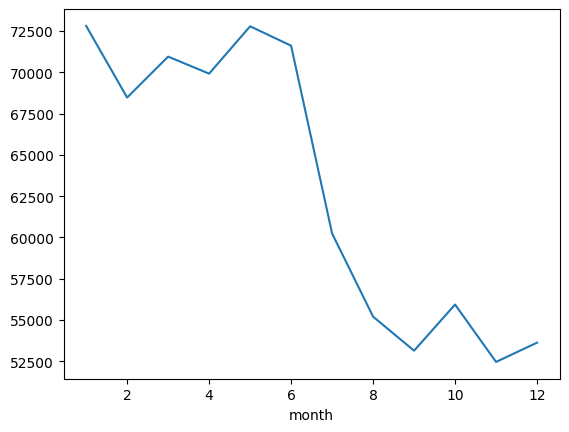

In [38]:
df['month'].value_counts().sort_index().plot()

<Axes: xlabel='year'>

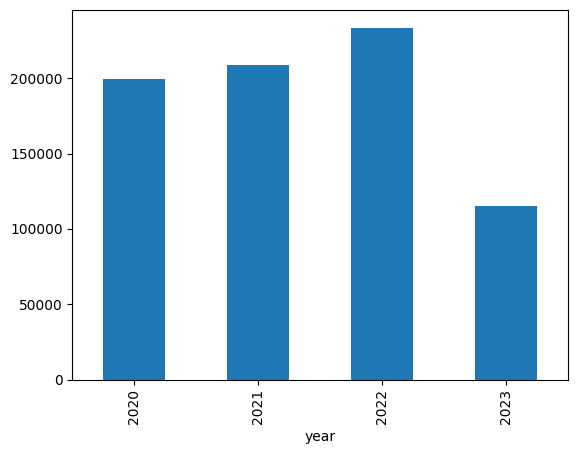

In [44]:
df['year'].value_counts().sort_index().plot(kind ='bar')

In [45]:
df.sort_values(by = 'month')

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON,year,month
0,10304468,2020-01-08,2020-01-08,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,501.0,SINGLE FAMILY DWELLING,AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978,2020,1
63073,201004015,2020-01-01,2020-01-01,130,10,West Valley,1012,1,350,"THEFT, PERSON",...,501.0,SINGLE FAMILY DWELLING,AA,Adult Arrest,350.0,7400 BAIRD AV,34.2048,-118.5374,2020,1
658141,230704533,2023-01-13,2023-01-04,2351,7,Wilshire,785,1,510,VEHICLE - STOLEN,...,101.0,STREET,IC,Invest Cont,510.0,23RD ST,34.0361,-118.3392,2023,1
388196,211205684,2021-01-26,2021-01-24,2200,12,77th Street,1242,1,210,ROBBERY,...,101.0,STREET,IC,Invest Cont,210.0,HYDE PARK BL,33.9808,-118.3245,2021,1
658148,230204738,2023-01-07,2023-01-07,549,2,Rampart,205,1,440,THEFT PLAIN - PETTY ($950 & UNDER),...,501.0,SINGLE FAMILY DWELLING,IC,Invest Cont,440.0,3200 DESCANSO DR,34.0853,-118.2753,2023,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388072,210218173,2021-12-01,2021-12-01,930,2,Rampart,246,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,801.0,MTA BUS,IC,Invest Cont,230.0,ALVARADO ST,34.0595,-118.2749,2021,12
97197,200321556,2020-12-10,2020-12-10,1720,3,Southwest,355,1,350,"THEFT, PERSON",...,102.0,SIDEWALK,IC,Invest Cont,350.0,WESTERN AV,34.0184,-118.3089,2020,12
388069,212018924,2021-12-30,2021-12-30,1555,20,Olympic,2031,1,210,ROBBERY,...,102.0,SIDEWALK,IC,Invest Cont,210.0,ST ANDREWS PL,34.0599,-118.3139,2021,12
97210,200122225,2020-12-11,2020-12-10,1115,1,Central,185,1,510,VEHICLE - STOLEN,...,101.0,STREET,IC,Invest Cont,510.0,900 S LOS ANGELES ST,34.0403,-118.2547,2020,12


In [46]:
df = df[~((df['month'] == 12) & (df['year'] == 2023))]

In [47]:
df.sort_values(by = 'DATE OCC')

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON,year,month
4833,220208037,2022-03-30,2020-01-01,800,2,Rampart,249,2,813,CHILD ANNOYING (17YRS & UNDER),...,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,813.0,1100 W 6TH ST,34.0541,-118.2621,2020,1
139125,201504516,2020-01-10,2020-01-01,800,15,N Hollywood,1532,2,860,BATTERY WITH SEXUAL CONTACT,...,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",AA,Adult Arrest,860.0,6300 WHITSETT AV,34.1849,-118.4052,2020,1
139388,201804096,2020-01-02,2020-01-01,2000,18,Southeast,1863,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,101.0,STREET,IC,Invest Cont,420.0,400 E 120TH ST,33.9237,-118.2681,2020,1
81102,201004051,2020-01-02,2020-01-01,1,10,West Valley,1008,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,203.0,OTHER BUSINESS,IC,Invest Cont,745.0,7200 HAYVENHURST AV,34.2012,-118.4924,2020,1
24091,211917141,2021-12-20,2020-01-01,1200,19,Mission,1969,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,...,501.0,SINGLE FAMILY DWELLING,AO,Adult Other,812.0,9800 SHARP AV,34.2482,-118.4268,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670352,230500727,2023-07-10,2023-07-10,30,5,Harbor,516,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,203.0,OTHER BUSINESS,IC,Invest Cont,740.0,L ST,33.7867,-118.2636,2023,7
727575,231712551,2023-07-10,2023-07-10,1200,17,Devonshire,1745,1,510,VEHICLE - STOLEN,...,108.0,PARKING LOT,IC,Invest Cont,510.0,17000 CHATSWORTH ST,34.2648,-118.5023,2023,7
648932,231215442,2023-07-10,2023-07-10,1140,12,77th Street,1253,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,501.0,SINGLE FAMILY DWELLING,IC,Invest Cont,740.0,7300 S HOBART BL,33.9735,-118.3079,2023,7
649696,230911636,2023-07-10,2023-07-10,1620,9,Van Nuys,914,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,101.0,STREET,IC,Invest Cont,230.0,6900 VESPER AV,34.1961,-118.4510,2023,7


<Axes: xlabel='year,month'>

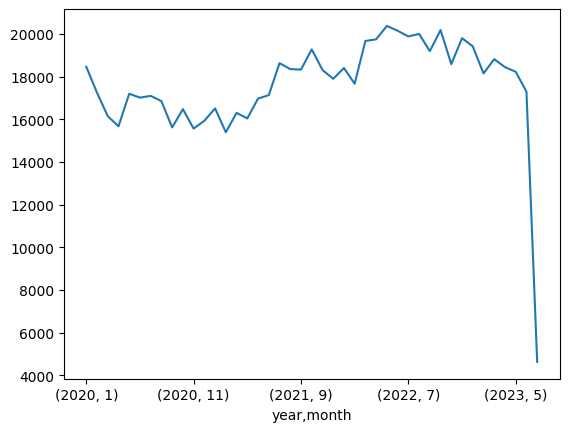

In [50]:
df.groupby(['year', 'month']).size().plot()

In [53]:
df_age.dtypes

DR_NO                    int64
Date Rptd       datetime64[ns]
DATE OCC        datetime64[ns]
TIME OCC                 int64
AREA                     int64
AREA NAME               object
Rpt Dist No              int64
Part 1-2                 int64
Crm Cd                   int64
Crm Cd Desc             object
Vict Age                 int64
Vict Sex                object
Vict Descent            object
Premis Cd              float64
Premis Desc             object
Status                  object
Status Desc             object
Crm Cd 1               float64
LOCATION                object
LAT                    float64
LON                    float64
dtype: object

(array([3.55300e+03, 1.64020e+04, 8.74930e+04, 1.29453e+05, 1.09315e+05,
        7.72390e+04, 6.47170e+04, 4.12850e+04, 2.59950e+04, 1.12560e+04,
        4.01500e+03, 1.09900e+03, 4.01000e+02, 0.00000e+00, 1.00000e+00]),
 array([  2.        ,   9.86666667,  17.73333333,  25.6       ,
         33.46666667,  41.33333333,  49.2       ,  57.06666667,
         64.93333333,  72.8       ,  80.66666667,  88.53333333,
         96.4       , 104.26666667, 112.13333333, 120.        ]),
 <BarContainer object of 15 artists>)

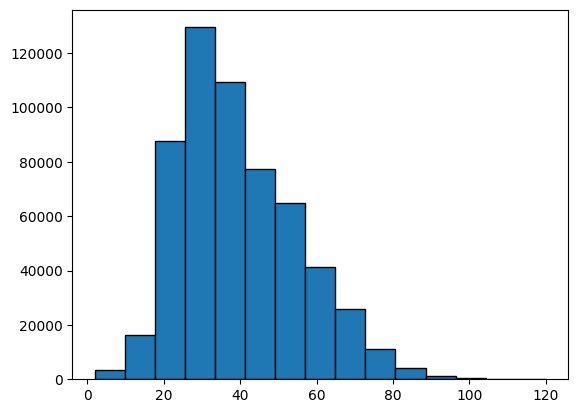

In [56]:
plt.hist(df_age['Vict Age'], edgecolor = 'black', bins = 15) 

In [58]:
df['data_occured_no_time'] = df['DATE OCC'].dt.date
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON,year,month,data_occured_no_time
0,10304468,2020-01-08,2020-01-08,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,SINGLE FAMILY DWELLING,AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978,2020,1,2020-01-08
1,190101086,2020-01-02,2020-01-01,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,SIDEWALK,IC,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545,2020,1,2020-01-01
2,200110444,2020-04-14,2020-02-13,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,POLICE FACILITY,AA,Adult Arrest,845.0,200 E 6TH ST,34.0448,-118.2474,2020,2,2020-02-13
3,191501505,2020-01-01,2020-01-01,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019,2020,1,2020-01-01
4,191921269,2020-01-01,2020-01-01,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,BEAUTY SUPPLY STORE,IC,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468,2020,1,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757136,231604807,2023-01-27,2023-01-26,1800,16,Foothill,1663,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,"VEHICLE, PASSENGER/TRUCK",IC,Invest Cont,740.0,12500 BRANFORD ST,34.2466,-118.4054,2023,1,2023-01-26
757137,231606525,2023-03-22,2023-03-22,1000,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,SIDEWALK,IC,Invest Cont,230.0,12800 FILMORE ST,34.2790,-118.4116,2023,3,2023-03-22
757138,231210064,2023-04-12,2023-04-12,1630,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,LAUNDROMAT,IC,Invest Cont,230.0,6100 S VERMONT AV,33.9841,-118.2915,2023,4,2023-04-12
757139,230115220,2023-07-02,2023-07-01,1,1,Central,154,1,352,PICKPOCKET,...,NIGHT CLUB (OPEN EVENINGS ONLY),IC,Invest Cont,352.0,500 S MAIN ST,34.0467,-118.2485,2023,7,2023-07-01


In [60]:
crime_count_per_day = df.groupby(['data_occured_no_time', 'Crm Cd Desc']).size()

In [66]:
top_twenty_crimes = crime_count_per_day.groupby('Crm Cd Desc').mean()\
            .reset_index(name = 'average_daily_count').sort_values(by = 'average_daily_count', ascending = False).head(20)

In [70]:
top_twenty_crimes_sorted = top_twenty_crimes.sort_values(by = 'average_daily_count', ascending = True)

<BarContainer object of 20 artists>

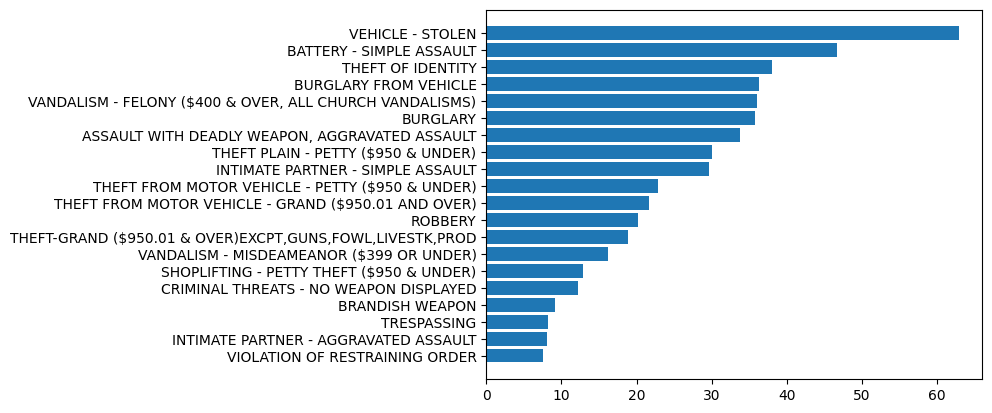

In [71]:
plt.barh(top_twenty_crimes_sorted['Crm Cd Desc'], top_twenty_crimes_sorted['average_daily_count'])
#plt.xticks(rotation = 90)

In [88]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [95]:
plt.style.use('seaborn-v0_8-dark-palette')

Text(0.5, 1.0, 'Top 20 Crimes')

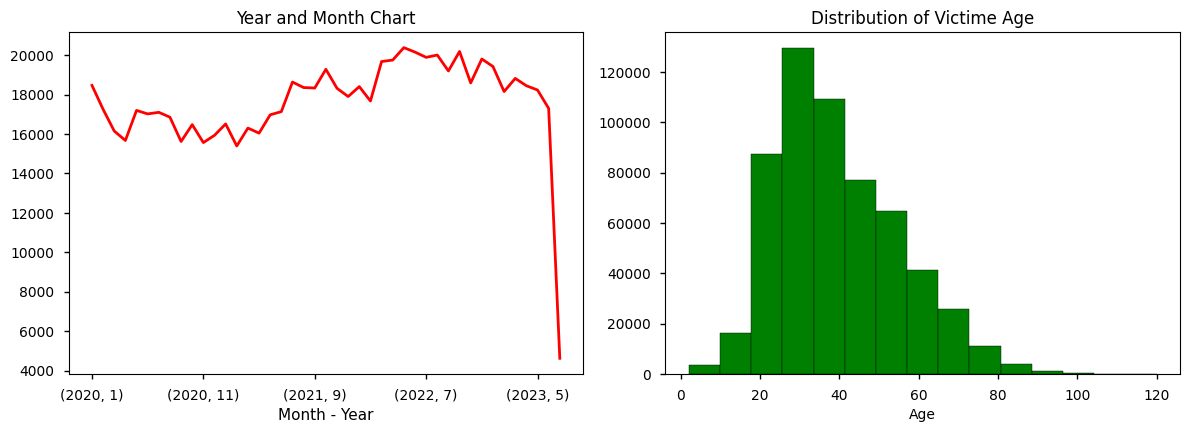

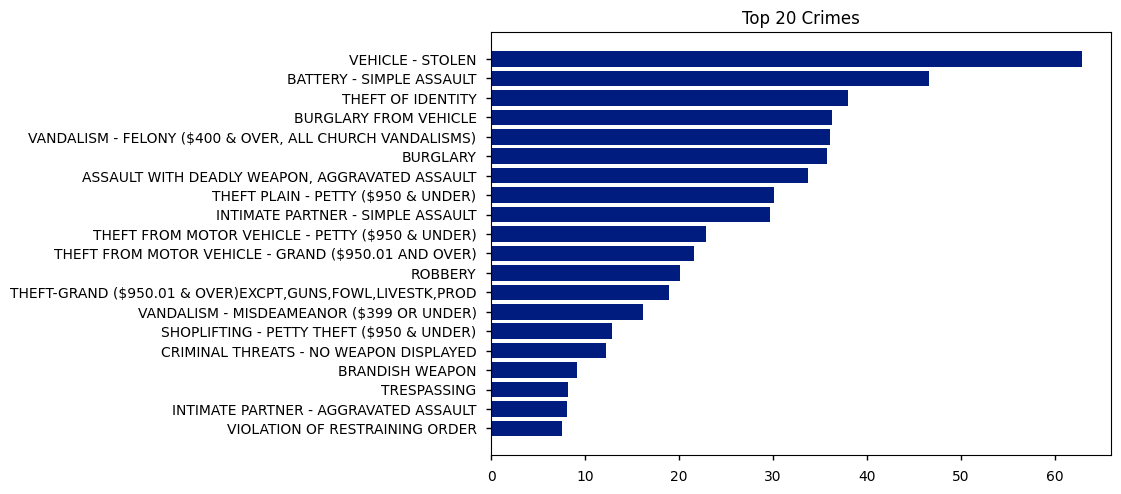

In [106]:
plt.figure(figsize = (12,8))
#plot 1 - Line Chart
plt.subplot(2,2,1)
df1 = df.groupby(['year', 'month']).size().plot(color='red', linewidth = 2)
df1.set_xlabel('Month - Year')
df1.set_title('Year and Month Chart')

#plot 2 - Histogram
plt.subplot(2,2,2)
plt.hist(df_age['Vict Age'], edgecolor='black', bins=15, color='green')
plt.tight_layout()
plt.xlabel('Age', fontsize=10)
plt.title('Distribution of Victime Age')

#plot 3 - Horizontal bar
plt.figure()
plt.barh(top_twenty_crimes_sorted['Crm Cd Desc'], top_twenty_crimes_sorted['average_daily_count'])
plt.title('Top 20 Crimes')

In [109]:
#How long it took to report a crime
df['Time to report'] = (pd.to_datetime(df['Date Rptd']) - pd.to_datetime(df['DATE OCC'])).dt.days
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON,year,month,data_occured_no_time,Time to report
0,10304468,2020-01-08,2020-01-08,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978,2020,1,2020-01-08,0
1,190101086,2020-01-02,2020-01-01,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545,2020,1,2020-01-01,1
2,200110444,2020-04-14,2020-02-13,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,200 E 6TH ST,34.0448,-118.2474,2020,2,2020-02-13,61
3,191501505,2020-01-01,2020-01-01,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019,2020,1,2020-01-01,0
4,191921269,2020-01-01,2020-01-01,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468,2020,1,2020-01-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757136,231604807,2023-01-27,2023-01-26,1800,16,Foothill,1663,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,12500 BRANFORD ST,34.2466,-118.4054,2023,1,2023-01-26,1
757137,231606525,2023-03-22,2023-03-22,1000,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,12800 FILMORE ST,34.2790,-118.4116,2023,3,2023-03-22,0
757138,231210064,2023-04-12,2023-04-12,1630,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,6100 S VERMONT AV,33.9841,-118.2915,2023,4,2023-04-12,0
757139,230115220,2023-07-02,2023-07-01,1,1,Central,154,1,352,PICKPOCKET,...,IC,Invest Cont,352.0,500 S MAIN ST,34.0467,-118.2485,2023,7,2023-07-01,1


In [108]:
df['Time to report'].value_counts()

Time to report
0 days      374376
1 days      164185
2 days       46891
3 days       27396
4 days       17677
             ...  
905 days         1
876 days         1
847 days         1
763 days         1
900 days         1
Name: count, Length: 1129, dtype: int64

In [122]:
df.groupby(['Crm Cd Desc'])['Time to report'].mean().sort_values().head(10)

Crm Cd Desc
FAILURE TO DISPERSE                                   0.000000
INCITING A RIOT                                       0.000000
PURSE SNATCHING - ATTEMPT                             0.083333
DISRUPT SCHOOL                                        0.090909
PETTY THEFT - AUTO REPAIR                             0.142857
LYNCHING                                              0.187500
FIREARMS RESTRAINING ORDER (FIREARMS RO)              0.250000
BOMB SCARE                                            0.340000
BATTERY POLICE (SIMPLE)                               0.388224
FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)    0.500000
Name: Time to report, dtype: float64

In [125]:
#Top 3 crimes with highest average victim age
df_age.groupby('Crm Cd Desc')['Vict Age'].mean().reset_index().sort_values(by = 'Vict Age', ascending = False).head(3)

,Crm Cd Desc,Vict Age
45,DISHONEST EMPLOYEE ATTEMPTED THEFT,60.0
63,GRAND THEFT / INSURANCE FRAUD,58.5
12,BLOCKING DOOR INDUCTION CENTER,57.6


In [136]:
#Areas with highest crimes during night time
night_time = df[(df['TIME OCC'] > 1900) | (df['TIME OCC'] <= 300)]
night_time['AREA NAME'].value_counts().sort_values(ascending = False)

AREA NAME
Central        17761
77th Street    16554
Hollywood      14741
Pacific        14323
Southeast      13921
Southwest      13874
Olympic        13341
Newton         12783
N Hollywood    12537
Rampart        12160
Wilshire       11013
Harbor         10935
Northeast      10660
West Valley    10519
West LA        10456
Van Nuys       10353
Mission        10136
Hollenbeck      9790
Topanga         9665
Devonshire      9600
Foothill        8155
Name: count, dtype: int64

In [127]:
df.groupby('AREA NAME')['night_time'].

AREA NAME    DR_NO      Date Rptd   DATE OCC    TIME OCC  AREA  Rpt Dist No  Part 1-2  Crm Cd  Crm Cd Desc                                      Vict Age  Vict Sex  Vict Descent  Premis Cd  Premis Desc                                   Status  Status Desc   Crm Cd 1  LOCATION                                 LAT      LON        year  month  data_occured_no_time  Time to report  night_time
77th Street  200300546  2020-01-11  2020-01-11  325       12    1203         2         890     FAILURE TO YIELD                                 19        X         X             101.0      STREET                                        IC      Invest Cont   890.0     50TH                         ST          33.9980  -118.3113  2020  1      2020-01-11            0               False         1
             200304574  2020-01-10  2020-01-07  1415      12    1215         2         662     BUNCO, GRAND THEFT                               29        M         H             501.0      SINGLE FAMILY DWELLING    

In [141]:
#Hourly crime count
hourly_crime = df['TIME OCC'].value_counts().sort_index().reset_index()

<BarContainer object of 1439 artists>

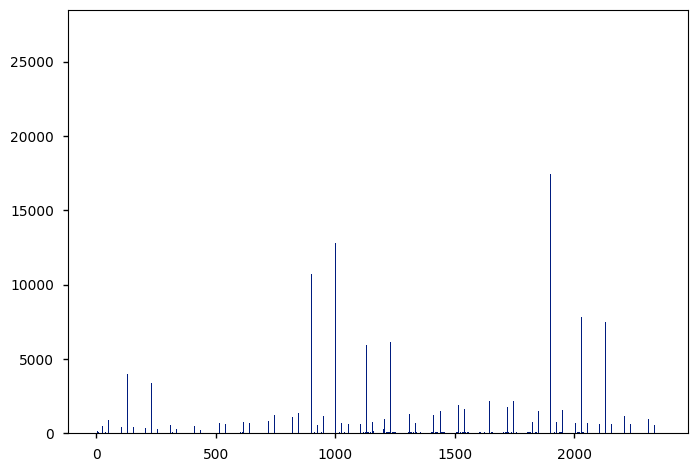

In [144]:
plt.bar(hourly_crime['TIME OCC'], hourly_crime['count'])

In [149]:
df[df['TIME OCC'] == 1200]['Crm Cd Desc'].value_counts()

Crm Cd Desc
THEFT OF IDENTITY                                  4765
VEHICLE - STOLEN                                   2590
BURGLARY                                           1854
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)    1723
THEFT PLAIN - PETTY ($950 & UNDER)                 1366
                                                   ... 
GRAND THEFT / INSURANCE FRAUD                         1
SHOPLIFTING - ATTEMPT                                 1
PURSE SNATCHING                                       1
TILL TAP - GRAND THEFT ($950.01 & OVER)               1
DISHONEST EMPLOYEE - PETTY THEFT                      1
Name: count, Length: 111, dtype: int64

In [153]:
no_identity_theft = df[~(df['Crm Cd Desc'] == 'THEFT OF IDENTITY')]

In [157]:
new_hourly_count = no_identity_theft['TIME OCC'].value_counts().sort_index().reset_index()

<BarContainer object of 1439 artists>

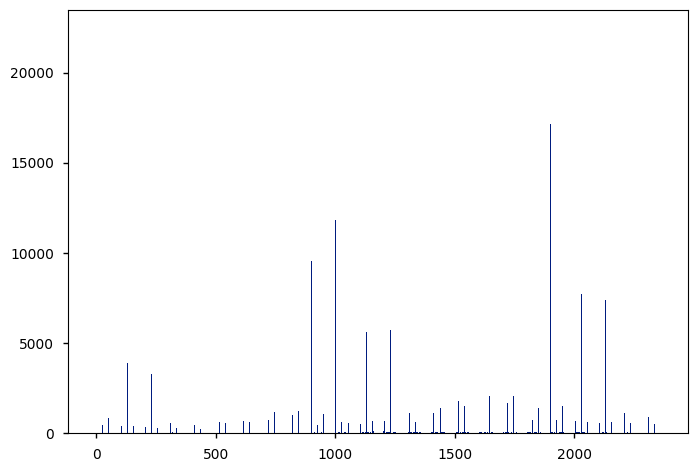

In [158]:
plt.bar(new_hourly_count['TIME OCC'], new_hourly_count['count'])